# Sunspot Power Spectral Density
Download Sunspot Data 
from the Solar Influences Data Analysis Center (SILSO) [https://www.sidc.be/SILSO/home]
and Estimate Power Spectral Density

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

Download sunspot data. <br>
[Solar Influences Data Analysis Center](https://idc.be/SILSO/home)

In [7]:
#filename = "/home/cgreco/Downloads/SN_m_tot_V2.0.txt"
filename_url = "https://www.sidc.be/SILSO/DATA/SN_m_tot_V2.0.txt"

In [3]:
df = pd.read_csv(filename_url,sep='\s+',index_col=False,header=None,
    names=["Year","Month","Date","Sunspots","Sunspots_SD","Indicator","Provisional"])
#print(df)

Display Sunspot data.

Text(0.5, 1.0, 'Numbers of Sunspots (Monthly Averages)')

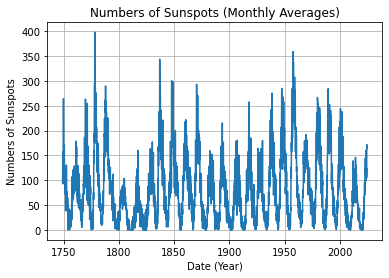

In [4]:
# Display Graph of Sunspots
plt.figure()
plt.plot(df["Date"],df["Sunspots"])
plt.grid()
plt.xlabel("Date (Year)")
plt.ylabel("Numbers of Sunspots")
plt.title("Numbers of Sunspots (Monthly Averages)")
#plt.show()

Power Spectral Density Estimation

In [5]:
Fs = 12     # Once per month (12 times per year)
NFFT = 2048
f, Pxx = signal.welch(df["Sunspots"].to_numpy(),fs=Fs,window='hanning',nperseg=12*80,
    noverlap=12*40,nfft=NFFT,detrend='linear',return_onesided=True,scaling='density')

Text(0.175, 50000.0, 'Peaks at [0.01757812 0.09375    0.18164062] Cycles/Year')

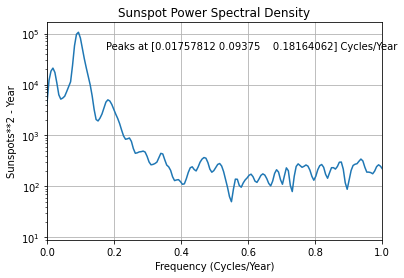

In [6]:
plt.figure()
plt.semilogy(f, Pxx)
plt.xlim(0,1)
plt.grid()
plt.xlabel('Frequency (Cycles/Year)')
plt.ylabel('Sunspots**2 - Year')
plt.title('Sunspot Power Spectral Density')
end_range = int(0.25*NFFT/12)
peaks, _ = signal.find_peaks(Pxx[0:end_range])
plt.text(0.175,5e4,f'Peaks at {peaks*12/NFFT} Cycles/Year')
#plt.show()